In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


In [2]:
df = pd.read_csv('../input/cardiogoodfitness/CardioGoodFitness.csv')

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.isna().sum()
# Wow!, no missing value in the dataset (very ideal)

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

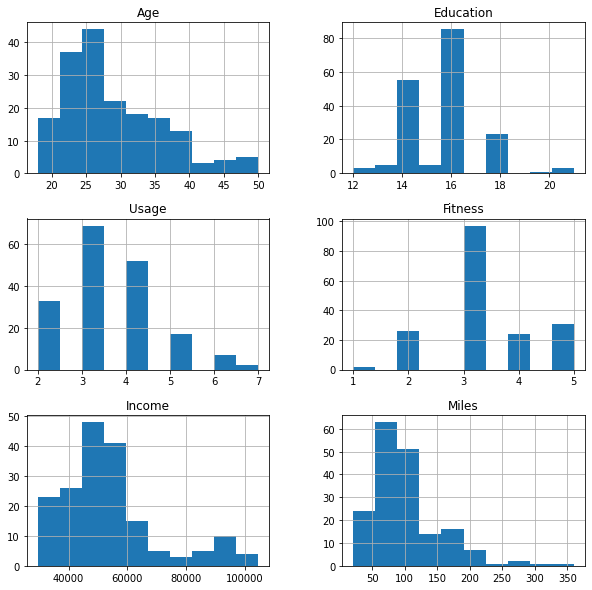

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df.hist(figsize=(10,10))
# only plot numerical value --> we have to inspect object values

<AxesSubplot:xlabel='Gender', ylabel='Age'>

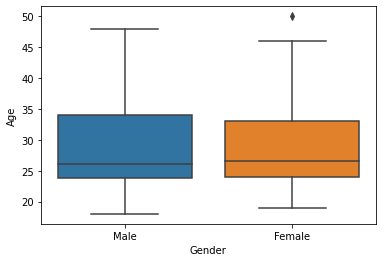

In [10]:
import seaborn as sns
sns.boxplot(x="Gender", y="Age", data=df)

In [11]:
pd.crosstab(df['Product'],df['Gender'])
# How many male and female customers on each product
# TM195 good sale on both
# TM498 good sale on both (but TM195 is more popular)
# TM798 good sale on Male 

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [12]:
pd.crosstab(df['Product'],df['MaritalStatus'])
# Product by Marriage
# Every product tend to be more popular on married person

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product', ylabel='count'>

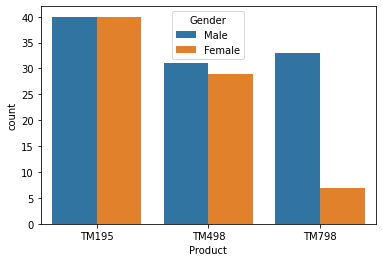

In [13]:
sns.countplot(x="Product", hue="Gender", data=df)
# Product and Gender relation, bar graph plotted

In [14]:
pd.pivot_table(df, index=['Product', 'Gender'], columns=['MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

In [16]:
pd.pivot_table(df,'Income', index=['Product', 'Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

In [17]:
pd.pivot_table(df,'Miles', index=['Product', 'Gender'], columns=[ 'MaritalStatus'])

MaritalStatus    Partnered      Single
Product Gender                        
TM195   Female   74.925926   78.846154
        Male     80.190476   99.526316
TM498   Female   94.000000   80.214286
        Male     87.238095   91.100000
TM798   Female  215.000000  133.333333
        Male    176.315789  147.571429

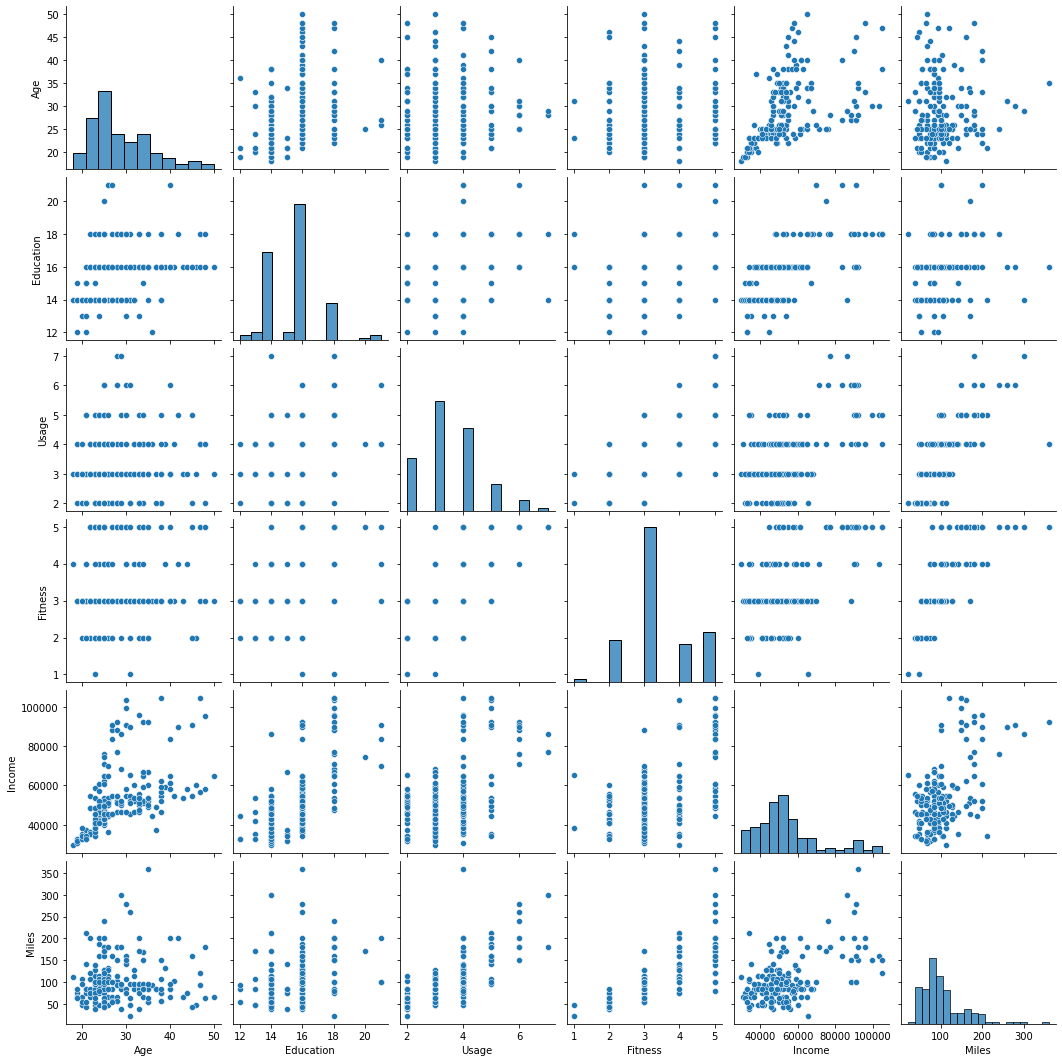

In [18]:
sns.pairplot(df)

In [22]:
df['Age'].std()
# Standard Deviation of Age

6.943498135399795

In [21]:
df['Age'].mean()
# Mean of Age

28.788888888888888

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

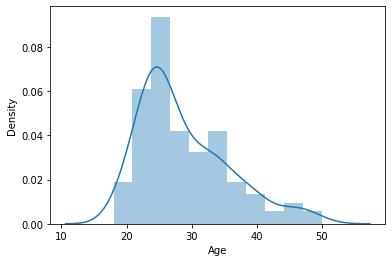

In [23]:
sns.distplot(df['Age'])
# Close look at Age bar graph

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

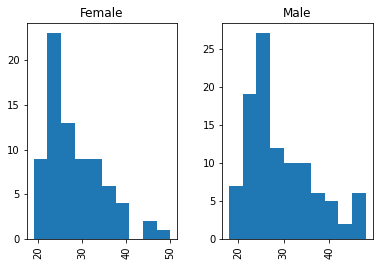

In [24]:
df.hist(by='Gender',column = 'Age')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

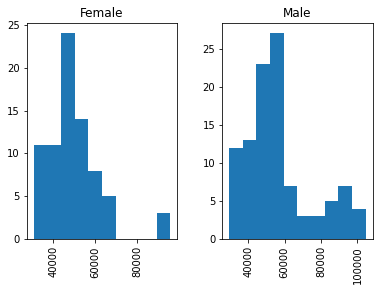

In [25]:
df.hist(by='Gender',column = 'Income')

array([[<AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <AxesSubplot:title={'center':'21'}>,
        <AxesSubplot:title={'center':'22'}>,
        <AxesSubplot:title={'center':'23'}>],
       [<AxesSubplot:title={'center':'24'}>,
        <AxesSubplot:title={'center':'25'}>,
        <AxesSubplot:title={'center':'26'}>,
        <AxesSubplot:title={'center':'27'}>,
        <AxesSubplot:title={'center':'28'}>,
        <AxesSubplot:title={'center':'29'}>],
       [<AxesSubplot:title={'center':'30'}>,
        <AxesSubplot:title={'center':'31'}>,
        <AxesSubplot:title={'center':'32'}>,
        <AxesSubplot:title={'center':'33'}>,
        <AxesSubplot:title={'center':'34'}>,
        <AxesSubplot:title={'center':'35'}>],
       [<AxesSubplot:title={'center':'36'}>,
        <AxesSubplot:title={'center':'37'}>,
        <AxesSubplot:title={'center':'38'}>,
        <AxesSubplot:title={'center':'39'}>,
       

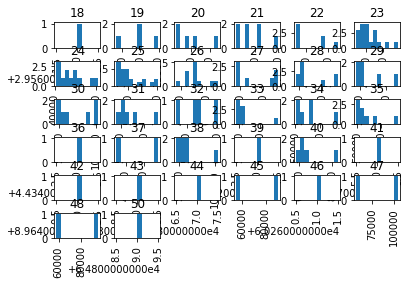

In [26]:
df.hist(by='Age',column = 'Income')

array([<AxesSubplot:title={'center':'Female'}>,
       <AxesSubplot:title={'center':'Male'}>], dtype=object)

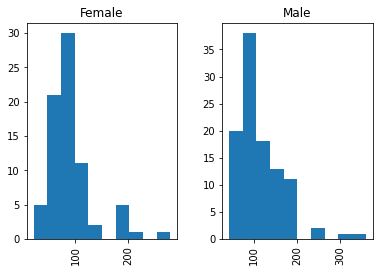

In [27]:
df.hist(by='Gender',column = 'Miles')

array([[<AxesSubplot:title={'center':'TM195'}>,
        <AxesSubplot:title={'center':'TM498'}>],
       [<AxesSubplot:title={'center':'TM798'}>, <AxesSubplot:>]],
      dtype=object)

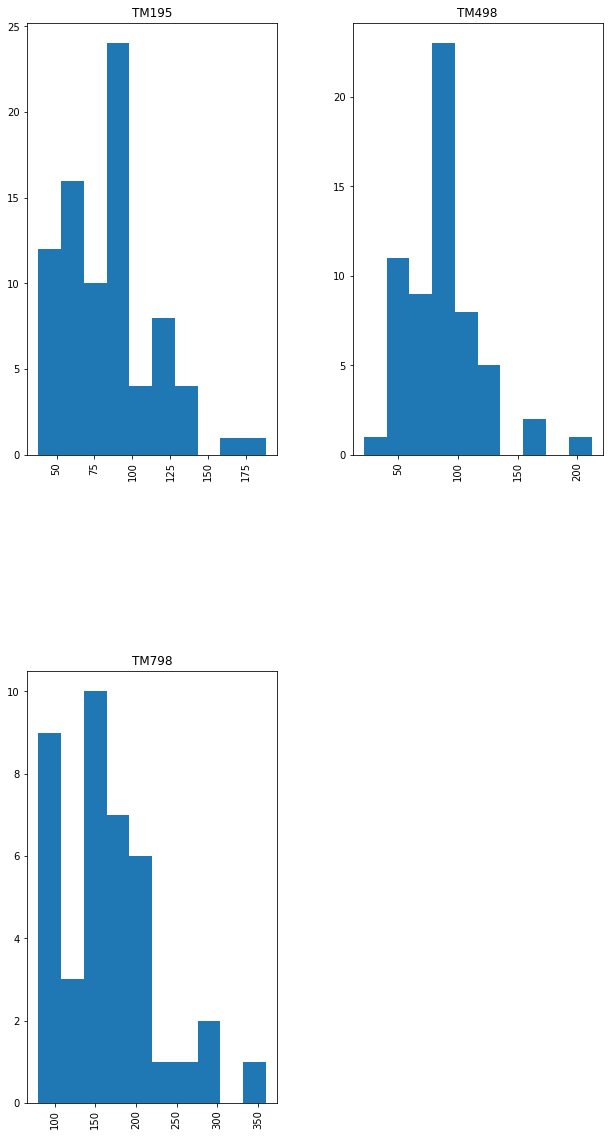

In [29]:
df.hist(by='Product',column = 'Miles', figsize=(10,20))

In [30]:
corr = df.corr()
corr
# self-self = 1
# not self-self; if close to 1, strongly correlated

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

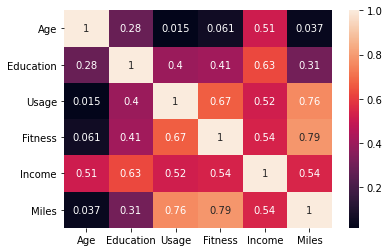

In [31]:
sns.heatmap(corr, annot=True)

In [33]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

y = df['Miles']
X = df[['Usage','Fitness']]

# Train the model using the training sets
reg.fit(X,y)

LinearRegression()

In [35]:
reg.coef_

array([20.21486334, 27.20649954])

In [36]:
reg.intercept_

-56.74288178464862

In [ ]:
# MilesPredicted = -56.74 + 20.21*Usage + 27.20*Fitness
# Coefficient and Intercept of Linear Regression